In [130]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn.cluster import KMeans

In [131]:
# importing in the dataset
df = pd.read_csv("data/estonia-passenger-list.csv")

In [132]:
# checking the data contents
df.head()

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
0,1,Sweden,ARVID KALLE,AADLI,M,62,P,0
1,2,Estonia,LEA,AALISTE,F,22,C,0
2,3,Estonia,AIRI,AAVASTE,F,21,C,0
3,4,Sweden,JURI,AAVIK,M,53,C,0
4,5,Sweden,BRITTA ELISABET,AHLSTROM,F,55,P,0


In [133]:
# checking for any missing data, and dtypes that are incorrect
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  989 non-null    int64 
 1   Country      989 non-null    object
 2   Firstname    989 non-null    object
 3   Lastname     989 non-null    object
 4   Sex          989 non-null    object
 5   Age          989 non-null    int64 
 6   Category     989 non-null    object
 7   Survived     989 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 61.9+ KB


In [134]:
# Looking at some statistical data
df.describe()

,PassengerId,Age,Survived
count,989.000000,989.000000,989.000000
mean,494.992922,44.575329,0.138524
std,285.643660,17.235146,0.345624
min,1.000000,0.000000,0.000000
25%,248.000000,30.000000,0.000000
50%,495.000000,44.000000,0.000000
75%,742.000000,59.000000,0.000000
max,989.000000,87.000000,1.000000


In [135]:
# checking for any Nan values
df.isna().sum()

PassengerId    0
Country        0
Firstname      0
Lastname       0
Sex            0
Age            0
Category       0
Survived       0
dtype: int64

In [136]:
# check for any duplicates
df.duplicated().sum()

0

In [137]:
# cleaning up outliears
Q1 = df['Age'].quantile(0.35)
Q3 = df['Age'].quantile(0.75)
iqr = Q3 - Q1 
filter = (df['Age'] >= Q1 - 1.5 * iqr) & (df['Age'] <= Q3 + 1.5 *iqr)
df_clean = df.loc[filter]

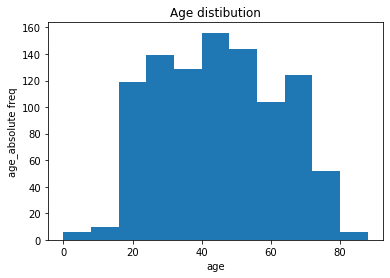

In [138]:
# Visualizing the distribution for age range
bins = np.arange(0, df["Age"].max()+8, 8)
df["Age"].hist(bins=bins)
plt.grid(False)
plt.xlabel("age")
plt.ylabel("age_absolute freq")
plt.title("Age distibution");

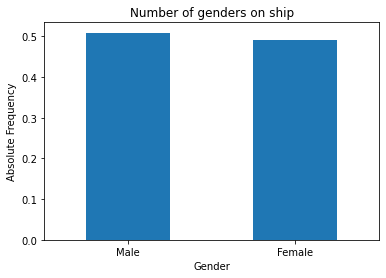

In [139]:
# checking to see number of gender on the ship
(df_clean["Sex"].value_counts()/df_clean.shape[0]).plot(kind="bar")
plt.xticks(rotation=0)
plt.xlabel("Gender")
plt.xticks([0,1], ["Male", "Female"])
plt.ylabel("Absolute Frequency")
plt.title("Number of genders on ship");

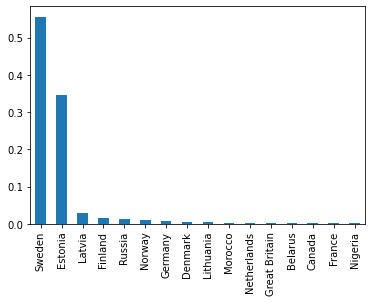

In [140]:
# plotting number of people per country
(df_clean["Country"].value_counts()/df.shape[0]).plot(kind="bar");

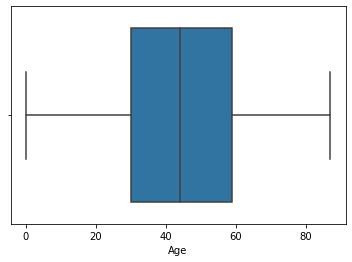

In [141]:
# using a boxplot to find out the average age
sb.boxplot(df["Age"])

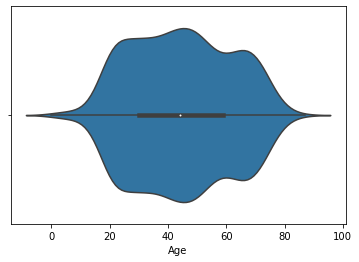

In [142]:
# Using a violin plot to determine the age distribution
sb.violinplot(df["Age"])

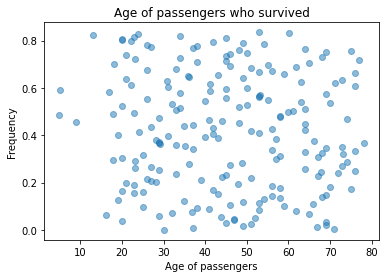

In [143]:
# creating a samples so one can plot the frequency of users
samples = np.random.choice(df_clean.shape[0], 200, replace=True)
df_samples = df_clean.iloc[samples]
max_n_value = (df_samples["Survived"].value_counts()/df_samples.shape[0])[0]
surv_freq = np.linspace(0, max_n_value, df_samples.shape[0])
sb.regplot(x=df_samples["Age"], y=surv_freq, fit_reg=False, x_jitter=0.1, scatter_kws={"alpha":1/2});
plt.xlabel("Age of passengers")
plt.ylabel("Frequency")
plt.title("Age of passengers who survived");

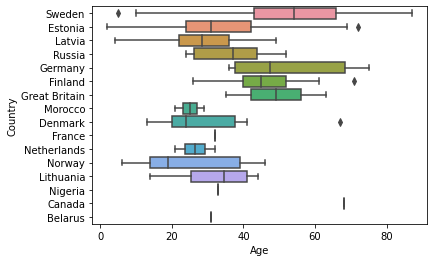

In [144]:
# Obtaining the average age per country
sb.boxplot(data=df_clean, x="Age", y="Country");


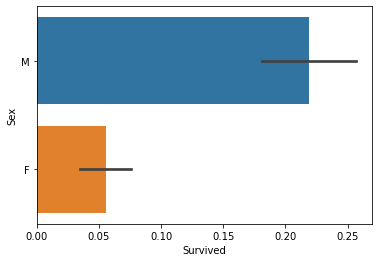

In [145]:
# Finding out the correaltion of gender survival
sb.barplot(y=df["Sex"], x=df["Survived"]==1);


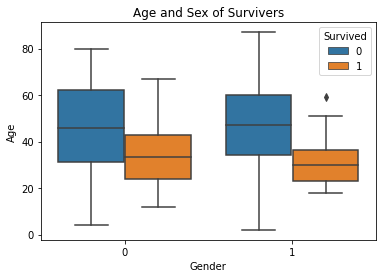

In [229]:
# creating a boxplot to indentify the Sex and Age of those who survived
sb.boxplot(data=df_clean, x="Sex", y="Age", hue="Survived");
plt.xlabel("Gender")
plt.ylabel("Age")
plt.title("Age and Sex of Survivers");

## Did age determined if you lived or survived?
It appears if you're in your 30's the

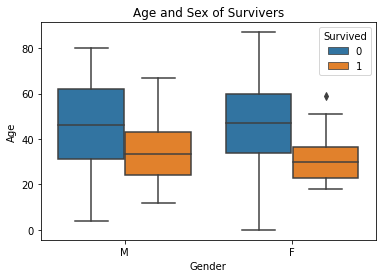

In [231]:
# Making my categorical data into dummies for Clustering
df_clean["Category"] = pd.get_dummies(df_clean["Category"])
df_clean["Country"] = pd.get_dummies(df_clean["Country"])
df_clean["Sex"] = pd.get_dummies(df_clean["Sex"])

In [232]:
# searching for the right centriod number to get how many cluster groups should be applied
scores = []
for center in range(1, 11):
    model_1 = KMeans(center)
    model_1.fit(data)
    pred = model_1.predict(data)
    scores.append(abs(model_1.score(data)))

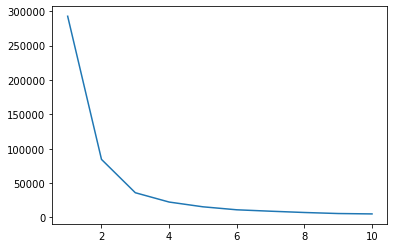

In [234]:
# Creating a plot with scores to find the Elbow
centers = list(range(1, 11))
plt.plot(centers, scores)

In [235]:
# Dropping groups I will not need
data = df_clean.drop(["PassengerId", "Firstname", "Lastname"], axis=1)

In [236]:
#Instatiating, fitting, and predicting the model
model = KMeans(3)
labels = model.fit_predict(data)
data["groups"] = labels + 1

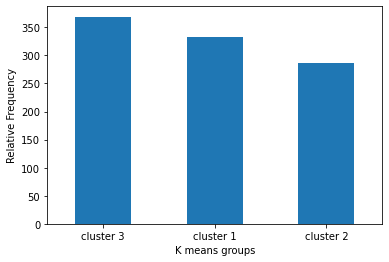

In [197]:
# Checking to see the population size of each group
(data["groups"].value_counts()).plot(kind="bar")
plt.xticks([0,1,2], ["cluster 3", "cluster 1", "cluster 2"], rotation=0)
plt.xlabel("K means groups")
plt.ylabel("Relative Frequency");

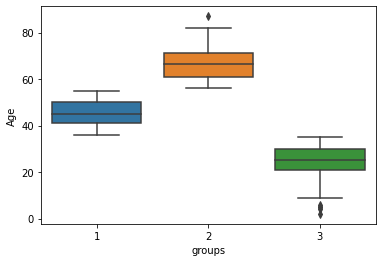

In [238]:
# boxplots to indentify the average age per group
sb.boxplot(data=data, x="groups", y="Age");

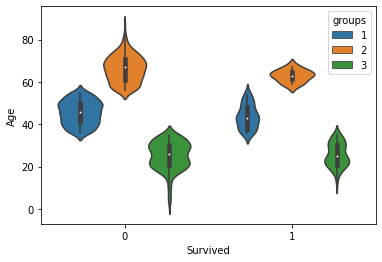

In [239]:
# Using a Violin plot to indentify average age of survivers per group
sb.violinplot(data=data, y="Age", x="Survived", hue="groups");
